# Import supporting package

In [1]:
import xarray as xr
import numpy as np
import copy

from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath
import random
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

from DataContainer.ReadData import read_hdf5_file
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import NewFitModel, DensityProfileBEC2dModel
from ToolFunction.ToolFunction import *

from scipy.optimize import curve_fit

from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

imageAnalyser = ImageAnalyser()

# %matplotlib notebook

## Start a client for parallel computing

In [2]:
from dask.distributed import Client
client = Client(n_workers=8, threads_per_worker=16, processes=True, memory_limit='20GB')
client

<Client: 'tcp://127.0.0.1:52558' processes=8 threads=128, memory=149.01 GiB>

## Set global path for experiment

In [3]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_0",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_1",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_2",
}


In [4]:
img_dir = '//DyLabNAS/Data/'
SequenceName = "Repetition_scan" + "/"
folderPath = img_dir + SequenceName + get_date()

# Repetition Scans

## scan MOT freq - Z Comp 0

In [ ]:
shotNum = "0000"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (310, 825)
imageAnalyser.span = (550, 1200)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('MOT AOM Freq (MHz)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## scan Push freq

In [ ]:
shotNum = "0001"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (310, 825)
imageAnalyser.span = (550, 1200)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('Push AOM Freq (MHz)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## scan cMOT final Amp

In [ ]:
shotNum = "0003"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (306, 874)
imageAnalyser.span = (550, 500)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('cMOT final Amp (%)')
plt.ylabel('NCount')
#plt.ylim([0, 25000])
plt.tight_layout()
plt.grid(visible=1)
plt.show()

## scan Z comp current

In [ ]:
shotNum = "0004"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i])
    for i in range(len(groupList))
}

dataSet = dataSetDict["camera_1"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (310, 825)
imageAnalyser.span = (550, 1200)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()
Ncount_mean.plot.errorbar(ax=ax, yerr = Ncount_std, fmt='ob')
plt.xlabel('comp Z current (A)')
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()

# Evaporative Cooling

In [5]:
img_dir = '//DyLabNAS/Data/'
SequenceName = "Evaporative_Cooling" + "/"
folderPath = img_dir + SequenceName + get_date()

# Check our BEC

In [ ]:
shotNum = "0001"
filePath = folderPath + "/" + shotNum + "/*.h5"

# datesetOfGlobal = xr.Dataset(
#         data_vars={}
# )

# datesetOfGlobal.attrs['scanAxis'] = ['sin_mod_freq']
# datesetOfGlobal.attrs['sin_mod_freq'] = [40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0]
dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i], excludeAxis = ['sweep_start_freq', 'sweep_stop_freq'])
    for i in [0]
}

dataSet = dataSetDict["camera_0"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (884, 953)
imageAnalyser.span = (100, 100)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount# .mean(dim='runs')
Ncount_std = Ncount# .std(dim='runs')

fig = plt.figure()
ax = fig.gca()

Ncount_mean.plot.errorbar(ax=ax, yerr = None, fmt='ob')

plt.ylabel('NCount')
plt.tight_layout()
#plt.ylim([0, 500])
plt.grid(visible=1)
plt.show()

In [ ]:
dataSet_cropOD.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

plt.show()

In [ ]:
fitModel = DensityProfileBEC2dModel()
fitAnalyser = FitAnalyser(fitModel, fitDim=2)
params = fitAnalyser.guess(dataSet_cropOD, guess_kwargs=dict(pureBECThreshold=0.3), dask="parallelized")
# params = fitAnalyser_1.fitModel.make_params()
# params.add(name="amplitude", value=  -4000, max=np.inf, min=-np.inf, vary=True)
# params.add(name="center", value=  0.435, max=np.inf, min=-np.inf, vary=True)
# params.add(name="sigma", value=  0.01, max=np.inf, min=  0, vary=True)
# params.add(name="offset", value=  1000, max=np.inf, min=-np.inf, vary=True)

fitResult = fitAnalyser.fit(dataSet_cropOD, params).load()

val = fitAnalyser.get_fit_value(fitResult)
std = fitAnalyser.get_fit_std(fitResult)

fitCurve = fitAnalyser.eval(fitResult, x=np.arange(100), y=np.arange(100), dask="parallelized").load()

fitCurve.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

In [ ]:
val

# Measure trap frequency at the end of evap. 3, blink off time = 275 µs

The detected scaning axes and values are: 

{'blink_on_time': array([0.005 , 0.0057, 0.0064, 0.0071, 0.0078, 0.0085, 0.0092, 0.0099,
       0.0106, 0.0113, 0.012 , 0.0127, 0.0134, 0.0141, 0.0148, 0.0155,
       0.0162, 0.0169, 0.0176, 0.0183, 0.019 , 0.0197, 0.0204, 0.0211,
       0.0218, 0.0225, 0.0232, 0.0239, 0.0246, 0.0253, 0.026 , 0.0267,
       0.0274, 0.0281, 0.0288, 0.0295, 0.0302, 0.0309, 0.0316, 0.0323,
       0.033 , 0.0337, 0.0344, 0.0351, 0.0358, 0.0365, 0.0372, 0.0379,
       0.0386, 0.0393, 0.04  ]), 'runs': array([0., 1., 2.])}


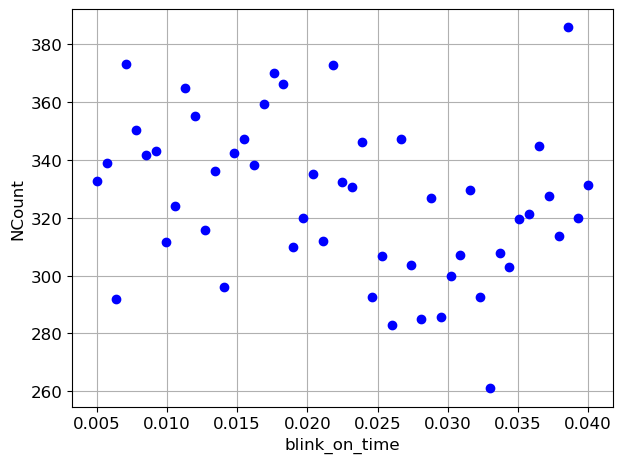

In [48]:
shotNum = "0015"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i], maxFileNum=153, excludeAxis = ['sweep_start_freq', 'sweep_stop_freq'])
    for i in [0]
}

dataSet = dataSetDict["camera_0"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (180, 958)
imageAnalyser.span = (100, 100)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()

Ncount_mean.plot.errorbar(ax=ax, yerr = None, fmt='ob')

plt.ylabel('NCount')
plt.tight_layout()
#plt.ylim([0, 500])
plt.grid(visible=1)
plt.show()

In [ ]:
dataSet_cropOD.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

plt.show()

In [49]:
fitAnalyser = FitAnalyser("Gaussian-2D", fitDim=2)
params = fitAnalyser.guess(dataSet_cropOD, dask="parallelized")
# params = fitAnalyser_1.fitModel.make_params()
# params.add(name="amplitude", value=  -4000, max=np.inf, min=-np.inf, vary=True)
# params.add(name="center", value=  0.435, max=np.inf, min=-np.inf, vary=True)
# params.add(name="sigma", value=  0.01, max=np.inf, min=  0, vary=True)
# params.add(name="offset", value=  1000, max=np.inf, min=-np.inf, vary=True)

fitResult = fitAnalyser.fit(dataSet_cropOD, params).load()

val = fitAnalyser.get_fit_value(fitResult)
std = fitAnalyser.get_fit_std(fitResult)

fitCurve = fitAnalyser.eval(fitResult, x=np.arange(100), y=np.arange(100), dask="parallelized").load()

# fitCurve.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

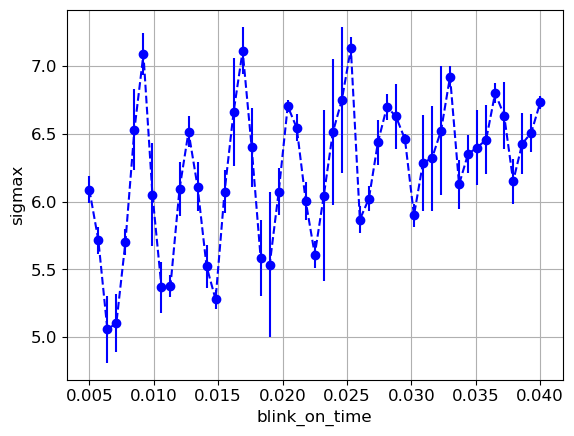

In [50]:
dataKey = 'sigmax'
# dataKey = 'centerx'
# dataKey = 'sigmay'
# dataKey = 'centery'

val_mean = val[dataKey].mean(dim='runs')
std_mean = val[dataKey].std(dim='runs')

fig = plt.figure()
ax = fig.gca()

val_mean.plot.errorbar(ax=ax, yerr=std_mean, fmt='--ob')

plt.grid()
plt.show()

In [51]:
def dampingOscillation(x, center=0, amplitude=1.0, frequency=1.0, decay=1.0, slope=1.0, intercept=0.0):
    return amplitude * np.exp(-decay*x)*np.sin(2*np.pi*frequency*(x-center)) + (slope * x + intercept)

fitModel = NewFitModel(dampingOscillation)

fitAnalyser = FitAnalyser(fitModel, fitDim=1)

params = fitAnalyser.fitModel.make_params()
params.add(name="center", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="amplitude", value=  1, max=np.inf, min=-np.inf, vary=True)
params.add(name="frequency", value=  260, max=np.inf, min=-np.inf, vary=True)
params.add(name="decay", value=  0.1, max=np.inf, min=-np.inf, vary=True)
params.add(name="slope", value=  30, max=np.inf, min=-np.inf, vary=True)
params.add(name="intercept", value=  5.5, max=np.inf, min=-np.inf, vary=True)

fitResult = fitAnalyser.fit(val_mean, params, x=scanAxis[0]).load()

x = np.linspace(val_mean[scanAxis[0]][0], val_mean[scanAxis[0]][-1], 500)
fitCurve = fitAnalyser.eval(fitResult, x=x, dask="parallelized").load()

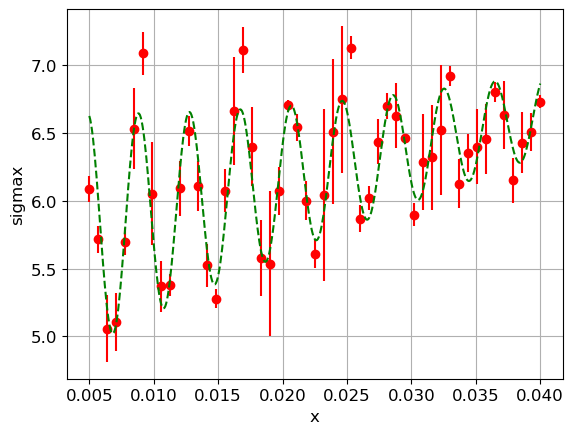

f_y = 126.5119 ± 0.7136 kHz


In [52]:
fig = plt.figure()
ax = fig.gca()

val_mean.plot.errorbar(ax=ax, yerr=std_mean, fmt='or')
fitCurve.plot.errorbar(ax=ax, yerr=None, fmt='--g')

plt.grid()

plt.xlabel('hold time after switch on the trap (s)')
plt.ylabel('y center (pixels)')

plt.show()

val = fitAnalyser.get_fit_full_result(fitResult)
f = val.frequency.item() / 2

print('f_y = %.4f \u00B1 %.4f kHz'% tuple([f.n,f.s]))

In [ ]:
from lmfit.models import LinearModel
from Analyser.FitAnalyser import DampingOscillationModel

fitModel = LinearModel() * DampingOscillationModel()

fitAnalyser = FitAnalyser(fitModel, fitDim=1)

params = fitAnalyser.fitModel.make_params()
params.add(name="slope", value=  30, max=np.inf, min=-np.inf, vary=True)
params.add(name="intercept", value=  5.5, max=np.inf, min=-np.inf, vary=True)
params.add(name="center", value=  0, max=np.inf, min=-np.inf, vary=True)
params.add(name="amplitude", value=  1, max=np.inf, min=-np.inf, vary=True)
params.add(name="frequency", value=  260, max=np.inf, min=-np.inf, vary=True)
params.add(name="decay", value=  0.1, max=np.inf, min=-np.inf, vary=True)
params.add(name="offset", value=  0, max=np.inf, min=-np.inf, vary=False)

fitResult = fitAnalyser.fit(val_mean, params, x=scanAxis[0]).load()

fitCurve = fitAnalyser.eval(fitResult, x=np.arange(100), y=np.arange(100), dask="parallelized").load()

# fitCurve.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

In [ ]:
val_mean = val[dataKey].mean(dim='runs')
std_mean = val[dataKey].std(dim='runs')
val

In [ ]:
def damp_osci(t, t0, A, B, nu, gamma):
    return A * np.exp(-gamma*t)*np.sin(2*np.pi*nu*(t-t0)) + B

fitted_qtys_1 = val_mean.to_numpy()
fitted_qtys_err_1 = std_mean.to_numpy()
scan_para = dataSet_cropOD[scanAxis[0]].to_numpy()

# fitted_qtys_1 = np.delete(fitted_qtys_1, 27)
# fitted_qtys_err_1 = np.delete(fitted_qtys_err_1, 27)
# scan_para = np.delete(scan_para, 27)

plt.figure()
popt_x, pcov_x = curve_fit(damp_osci, scan_para, fitted_qtys_1, np.array([0, 7.5, 42.5, 1.3e2, 0.1]))
freqdata = np.linspace(0.005, 40e-3, 500)
plt.plot(freqdata, damp_osci(freqdata, *popt_x), 'g--',label='fit: t0=%5.3f, A=%5.3f, B=%5.3f, nu=%5.3f, Gamma=%5.3f' % tuple(popt_x))
plt.errorbar(scan_para, fitted_qtys_1, yerr=fitted_qtys_err_1, fmt='or')
plt.xlabel('hold time after switch on the trap (s)')
plt.ylabel('y center (pixels)')
plt.tight_layout()
plt.grid(visible=1)
#plt.ylim([0,750])
#plt.xlim([90, 121])
#plt.legend(prop={'size': 14})
plt.show()

f_x = popt_x[3] / 1000
df_x = pcov_x[3][3]**0.5 / 1000

print('f_y = %.4f \u00B1 %.4f kHz'% tuple([np.abs(f_x),df_x]))

# Measure trap frequency at the end of evap. 3, blink off time = 250 µs

In [ ]:
%matplotlib notebook
shotNum = "0015"
filePath = folderPath + "/" + shotNum + "/*.h5"

dataSetDict = {
    dskey[groupList[i]]: read_hdf5_file(filePath, groupList[i], maxFileNum=102, excludeAxis = ['sweep_start_freq', 'sweep_stop_freq'])
    for i in [0]
}

dataSet = dataSetDict["camera_0"]

print_scanAxis(dataSet)

scanAxis = get_scanAxis(dataSet)

dataSet = auto_rechunk(dataSet)

dataSet = imageAnalyser.get_absorption_images(dataSet)

imageAnalyser.center = (180, 958)
imageAnalyser.span = (100, 100)
imageAnalyser.fraction = (0.1, 0.1)

dataSet_cropOD = imageAnalyser.crop_image(dataSet.OD)
dataSet_cropOD = imageAnalyser.substract_offset(dataSet_cropOD).load()

Ncount = imageAnalyser.get_Ncount(dataSet_cropOD)
Ncount_mean = Ncount.mean(dim='runs')
Ncount_std = Ncount.std(dim='runs')

fig = plt.figure()
ax = fig.gca()

Ncount_mean.plot.errorbar(ax=ax, yerr = None, fmt='ob')

plt.ylabel('NCount')
plt.tight_layout()
#plt.ylim([0, 500])
plt.grid(visible=1)
plt.show()

In [ ]:
dataSet_cropOD.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

plt.show()

In [ ]:
fitAnalyser = FitAnalyser("Gaussian-2D", fitDim=2)
params = fitAnalyser.guess(dataSet_cropOD, dask="parallelized")
# params = fitAnalyser_1.fitModel.make_params()
# params.add(name="amplitude", value=  -4000, max=np.inf, min=-np.inf, vary=True)
# params.add(name="center", value=  0.435, max=np.inf, min=-np.inf, vary=True)
# params.add(name="sigma", value=  0.01, max=np.inf, min=  0, vary=True)
# params.add(name="offset", value=  1000, max=np.inf, min=-np.inf, vary=True)

fitResult = fitAnalyser.fit(dataSet_cropOD, params).load()

val = fitAnalyser.get_fit_value(fitResult)
std = fitAnalyser.get_fit_std(fitResult)

fitCurve = fitAnalyser.eval(fitResult, x=np.arange(100), y=np.arange(100), dask="parallelized").load()

# fitCurve.plot.pcolormesh(cmap='jet', vmin=0, col=scanAxis[0], row=scanAxis[1])

In [ ]:
# dataKey = 'sigmax'
dataKey = 'centerx'
# dataKey = 'sigmay'
# dataKey = 'centery'

val_mean = val[dataKey].mean(dim='runs')
std_mean = val[dataKey].std(dim='runs')

fig = plt.figure()
ax = fig.gca()

val_mean.plot.errorbar(yerr=std_mean, fmt='--ob')

plt.grid()
plt.show()

In [ ]:
def damp_osci(t, t0, A, B, nu, gamma):
    return A * np.exp(-gamma*t)*np.sin(2*np.pi*nu*(t-t0)) + B

fitted_qtys_1 = val_mean.to_numpy()
fitted_qtys_err_1 = std_mean.to_numpy()
scan_para = dataSet_cropOD[scanAxis[0]].to_numpy()

# fitted_qtys_1 = np.delete(fitted_qtys_1, 27)
# fitted_qtys_err_1 = np.delete(fitted_qtys_err_1, 27)
# scan_para = np.delete(scan_para, 27)

plt.figure()
popt_x, pcov_x = curve_fit(damp_osci, scan_para, fitted_qtys_1, np.array([0, 7.5, 42.5, 1.3e2, 0.1]))
freqdata = np.linspace(0.005, 40e-3, 500)
plt.plot(freqdata, damp_osci(freqdata, *popt_x), 'g--',label='fit: t0=%5.3f, A=%5.3f, B=%5.3f, nu=%5.3f, Gamma=%5.3f' % tuple(popt_x))
plt.errorbar(scan_para, fitted_qtys_1, yerr=fitted_qtys_err_1, fmt='or')
plt.xlabel('hold time after switch on the trap (s)')
plt.ylabel('y center (pixels)')
plt.tight_layout()
plt.grid(visible=1)
#plt.ylim([0,750])
#plt.xlim([90, 121])
#plt.legend(prop={'size': 14})
plt.show()

f_x = popt_x[3] / 1000
df_x = pcov_x[3][3]**0.5 / 1000

print('f_y = %.4f \u00B1 %.4f kHz'% tuple([np.abs(f_x),df_x]))

In [ ]:
np.sqrt(0.091**2 + 0.334**2 + 0.447**2)

In [ ]:
muB = 9.274e-24
hbar = 6.626e-34 / (2 * np.pi)
gJ = 1.24
Delta = 2 * np.pi * 579.12 * 1e3

Bz = (Delta*hbar) / (muB*gJ)
print(Bz * 1e4)

In [ ]:
(fitted_SlopeInkHz * 0.5) + fitted_offsetInkHz

In [ ]:
l = list(np.arange(0.005, 0.04, 0.0007))
# l = np.logspace(np.log10(250e-6), np.log10(500e-3), num=15)

l = [round(item, 7) for item in l]
#random.shuffle(l)

print(l)
print(len(l))
np.mean(l)

## ODT 1 Calibration

In [ ]:
v_high = 2.7
"""High Power"""
P_arm1_high = 5.776 * v_high - 0.683

v_mid = 0.2076
"""Intermediate Power"""
P_arm1_mid = 5.815 * v_mid - 0.03651

v_low = 0.0587
"""Low Power"""
P_arm1_low = 5271 * v_low - 27.5

print(round(P_arm1_high, 3))
print(round(P_arm1_mid, 3))
print(round(P_arm1_low, 3))

## ODT 2 Power Calibration

In [ ]:
v = 0.7607
P_arm2 = 2.302 * v - 0.06452
print(round(P_arm2, 3))